<a href="https://colab.research.google.com/github/Christian-F-Badillo/NLP_challenge_MeIA/blob/main/NLP_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Challenge

Proyect for the NLP Challenge by [MeIA](https://www.taller-tic.redmacro.unam.mx/MeIA/)

Github Repository: [https://github.com/Christian-F-Badillo/NLP_challenge_MeIA](https://github.com/Christian-F-Badillo/NLP_challenge_MeIA)

> Authors: [Christian Badillo](mailto:cris.badillo1408@gmail.com),

## Preprocessing

### Libraries

In [114]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Data

In [115]:
# Load Data from Github in CSV UTF-8 format
url = "https://raw.githubusercontent.com/Christian-F-Badillo/NLP_challenge_MeIA/main/MeIA_Rest_Mex_Sentiment_Analysis_2023_Train.csv"
data = pd.read_csv(url)

In [116]:
# First fiftenn observations.
data.head(15)

,Review,Class,Unnamed: 2,Unnamed: 3
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0,NaN,NaN
1,"yo estaba tan emocionada de este viaje, pero t...",1.0,NaN,NaN
2,Este hotel es un engaño. De cuatro estrellas n...,1.0,NaN,NaN
3,La ducha se inundo completamente a los 5 min ...,1.0,NaN,NaN
4,Decidimos alquilar un taxi por un día para ir ...,1.0,NaN,NaN
5,Pasamos cuatro noches en este hotel (habitac 7...,1.0,NaN,NaN
6,"No me he alojado en este hotel, pero se recome...",1.0,NaN,NaN
7,"Muy mala atencion, entramos a beber algo y as...",1.0,NaN,NaN
8,"Así que volví como he dicho. El hotel, que for...",1.0,NaN,NaN
9,"La ciudad es bonita, pero la gente deja muchis...",1.0,NaN,NaN


In [117]:
# General Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21727 entries, 0 to 21726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      17500 non-null  object 
 1   Class       17500 non-null  float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 679.1+ KB


### Data Cleaning

In [118]:
# Drop Empty Columns
data.drop(["Unnamed: 2", "Unnamed: 3"], inplace = True, axis = 1)
data.head()

,Review,Class
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0
1,"yo estaba tan emocionada de este viaje, pero t...",1.0
2,Este hotel es un engaño. De cuatro estrellas n...,1.0
3,La ducha se inundo completamente a los 5 min ...,1.0
4,Decidimos alquilar un taxi por un día para ir ...,1.0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21727 entries, 0 to 21726
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  17500 non-null  object 
 1   Class   17500 non-null  float64
dtypes: float64(1), object(1)
memory usage: 339.6+ KB


In [120]:
# Rename Columns
data.rename(columns = {'Class':'target', "Review": "review"}, inplace = True)

# Find null indices to drop.
nan_values = np.where(data.target.isnull())

In [121]:
# Drop Null Rows.
data.drop(nan_values[0], inplace = True, axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  17500 non-null  object 
 1   Class   17500 non-null  float64
dtypes: float64(1), object(1)
memory usage: 273.6+ KB


In [123]:
# Check for more Null values.
data.isnull().sum()

review    0
target    0
dtype: int64

In [124]:
# Show the first fifteen observations.
data.head(15)

,review,target
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0
1,"yo estaba tan emocionada de este viaje, pero t...",1.0
2,Este hotel es un engaño. De cuatro estrellas n...,1.0
3,La ducha se inundo completamente a los 5 min ...,1.0
4,Decidimos alquilar un taxi por un día para ir ...,1.0
5,Pasamos cuatro noches en este hotel (habitac 7...,1.0
6,"No me he alojado en este hotel, pero se recome...",1.0
7,"Muy mala atencion, entramos a beber algo y as...",1.0
8,"Así que volví como he dicho. El hotel, que for...",1.0
9,"La ciudad es bonita, pero la gente deja muchis...",1.0


### Visualization of Target's Distribution

In [126]:
# Freq of Classes.
heights = data.target.value_counts().sort_index(ascending=True)
print(heights)

1.0    1750
2.0    2625
3.0    3500
4.0    4375
5.0    5250
Name: target, dtype: int64


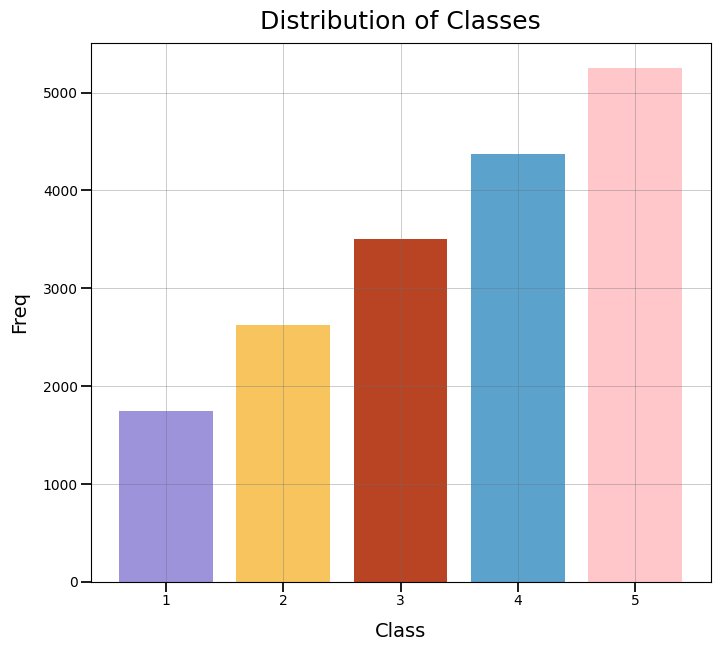

In [127]:
# Barplot of Class Distribution.

# Bar Color
colors = ["#9C93DB", "#F7C45E", "#B84423", "#5BA2CC", "#FFC7C9"]

fig, ax = plt.subplots(figsize = (8, 7))

ax.bar(x = data.target.unique(), height = heights, color = colors)

# Custom
ax.tick_params(direction='out', length = 7, width = 1.25 , colors='black',
                grid_color='black', grid_alpha= 0.5, pad = 2, labelsize = 10) # Custom ticks and ricks label major axis
ax.grid(visible = True, color='#65707A', linestyle='-', linewidth=0.5) # Add a grid for readability
ax.set_xticks(range(1,6))  # Custom ticks labels for x-axis

# Labels
ax.set_title("Distribution of Classes", size = 18, pad = 10)
ax.set_ylabel(r"Freq", labelpad=10, size = 14)
ax.set_xlabel(r"Class", labelpad = 10, size = 14)

plt.show()